# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns





# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = 'shematonny'
os.environ['KAGGLE_KEY'] = '441cb01a2cf318f44263dd2263ce6b4a'


In [ ]:
#download dataset

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 16.6MB/s]


In [ ]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
  inflating: data.csv                


# Load & Explore Data

In [ ]:
#load data on dataframe
df = pd.read_csv('/content/data.csv')

In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df.shape


(569, 33)

In [ ]:
#count number of null(empty) values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [ ]:
# count of rows and columns
df.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
df.iloc[:,1]= labelencoder.fit_transform(df.iloc[:,1].values)


In [ ]:
#display df
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets (separating the features and target)
X = df.iloc[:,2:].values
Y = df.iloc[:,1].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25)

In [ ]:
#Scaling the data(feature scaling) // data normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#print data
X_train

array([[-1.16726024, -0.28485825, -1.09756811, ..., -0.22813318,
        -0.4310683 ,  1.89502338],
       [ 0.4869285 ,  1.1292267 ,  0.48071863, ..., -0.03461131,
        -0.11874465, -1.18400081],
       [-0.82062062, -1.48046828, -0.84447712, ..., -0.89396937,
        -0.03866166, -0.90398455],
       ...,
       [-0.7455061 ,  0.27213276, -0.57362535, ...,  2.16669999,
         6.01401055,  5.1743891 ],
       [-1.28939089,  0.42338463, -1.27880871, ..., -0.74111733,
        -0.00823012,  0.50417971],
       [ 0.82077082, -0.03997427,  0.87226291, ...,  2.11831952,
         0.36175328,  0.41757674]])

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#make use of trained model to make predictions on test data
predictions = classifier.predict(X_test)

# Performance Evaluation

[[91  2]
 [ 2 48]]


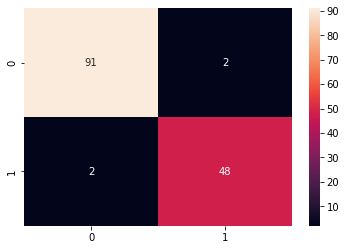

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(Y_test, predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, predictions))

0.972027972027972


[1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1
 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0]


In [ ]:
print(predictions)

[0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1]


## **Building a classification system**


In [1]:

input_data = (13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
reshaped_data = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(reshaped_data)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



NameError: ignored

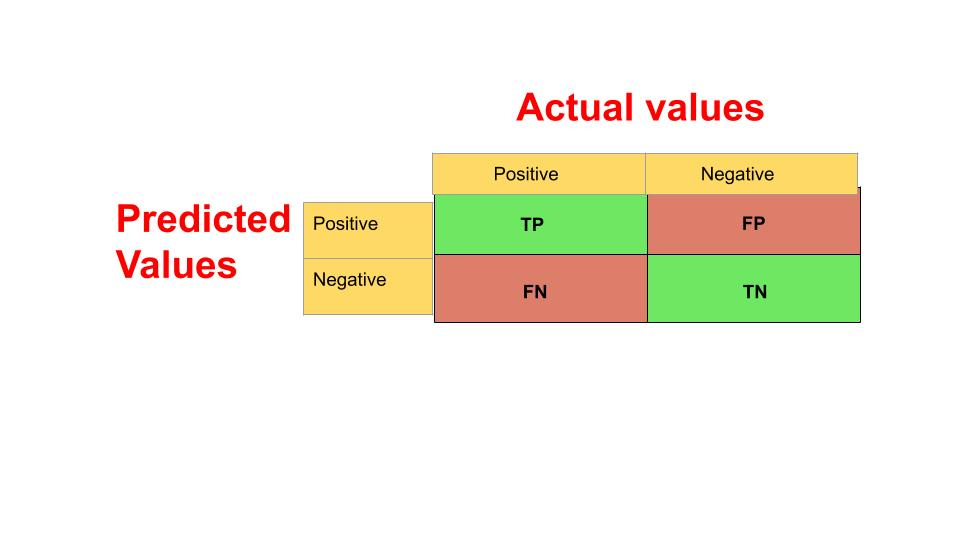

## Save and Load ML Models

## *`WHAT`* On various instances, while working on developing a Machine Learning Model, we'll need to save our prediction models to file, and then restore them in order to reuse our previous work to.

***`WHY`*** We need to save and restore/reload later our ML Model , so as to -

a) test our model on/with new data,

b) compare multiple models,

c) or anything else.



In [ ]:
# Import Joblib Module from Scikit Learn
import joblib

In [ ]:
# Save RL_Model to file in the current working directory

joblib_file = "joblib_Breast_cancer_Model.pkl"  
joblib.dump(classifier, joblib_file)

['joblib_Breast_cancer_Model.pkl']

In [ ]:
# Load from file

joblib_Breast_cancer_Model = joblib.load(joblib_file)


joblib_Breast_cancer_Model

LogisticRegression()

In [ ]:
# Use the Reloaded Joblib Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = joblib_Breast_cancer_Model.score(X_test, Y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = joblib_Breast_cancer_Model.predict(reshaped_data)  

Ypredict



Test score: 97.20 %


array([1])

In [ ]:
if (Ypredict[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')



The Breast Cancer is Benign


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored